In [1]:
# Import pandas for data handling
import pandas as pd

import numpy as np

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re
# import json
import json

#pickle
import pickle

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
list_dic = []
with open('data/News_Category_Dataset_v2.json') as json_file:
    for the_file in json_file:
        list_dic.append(json.loads(the_file))

In [3]:
df = pd.DataFrame(list_dic)

#drop dupe
df = df.drop_duplicates()

#drop empty headlines
df.loc[df['headline'] == "", 'headline'] = np.nan
df.dropna(subset=['headline'], inplace=True)


In [4]:
#functions to clean up text
def return_lower(text):
    return text.lower()

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]','', text)
    return text

def remove_stopwords(text):
    words = word_tokenize(text)
    valid_words = []
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    text = " ".join(valid_words)
    return text;

def stem_words(text):
    #initialize stemmer
    porter = PorterStemmer()
    #tokenize words
    words = word_tokenize(text)
    #place to append valid words
    valid_words = []
    
    for word in words:
        stem_word = porter.stem(word)
        valid_words.append(stem_word)
    text = " ".join(valid_words)
    return text

def text_pipeline(input_string):
    input_string = return_lower(input_string)
    input_string = remove_punctuation(input_string)
    input_string = remove_stopwords(input_string)
    #input_string = stem_words(input_string)
    return input_string

In [5]:
df['headline_clean'] = df['headline'].apply(text_pipeline)

In [6]:
categories = df.category.unique()

#Want to regroup categories
def regroup(grouplist,name):
    for cat in categories:
        if cat in grouplist:
            df.loc[df['category'] == cat, 'category'] = name
            
#Grouping into new categories (modified)
regroup( grouplist= ['WELLNESS', 'HEALTHY LIVING','HOME & LIVING'] , name =  'LIFESTYLE AND WELLNESS')
regroup( grouplist= ['STYLE & BEAUTY' ,'STYLE'] , name =  'STYLE & BEAUTY')

regroup( grouplist= ['PARENTING', 'PARENTS'] , name =  'PARENTING')
regroup( grouplist= ['EDUCATION' ,'COLLEGE'] , name =  'EDUCATION')

regroup( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY', 'WEIRD NEWS', 'ARTS'] , name =  'SPORTS AND ENTERTAINMENT')

regroup( grouplist= ['ARTS & CULTURE','CULTURE & ARTS'] , name =  'ART-CULTURE')
regroup( grouplist= ['FOOD & DRINK', 'TASTE'] , name =  'FOOD & DRINK')

regroup( grouplist= ['WOMEN', 'QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

regroup( grouplist= ['BUSINESS',  'MONEY'] , name =  'BUSINESS-MONEY')

regroup( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

regroup( grouplist= ['ENVIRONMENT', 'GREEN'] , name =  'ENVIRONMENT')

regroup( grouplist= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

regroup( grouplist= ['FIFTY', 'IMPACT' ,'GOOD NEWS', 'CRIME'] , name =  'GENERAL NEWS')

regroup( grouplist= ['WEDDINGS', 'DIVORCE'] , name =  'MARRIAGE') 
#Religion, Media
#mass media
regroup( grouplist= ['MEDIA'] , name =  'MASS MEDIA') 

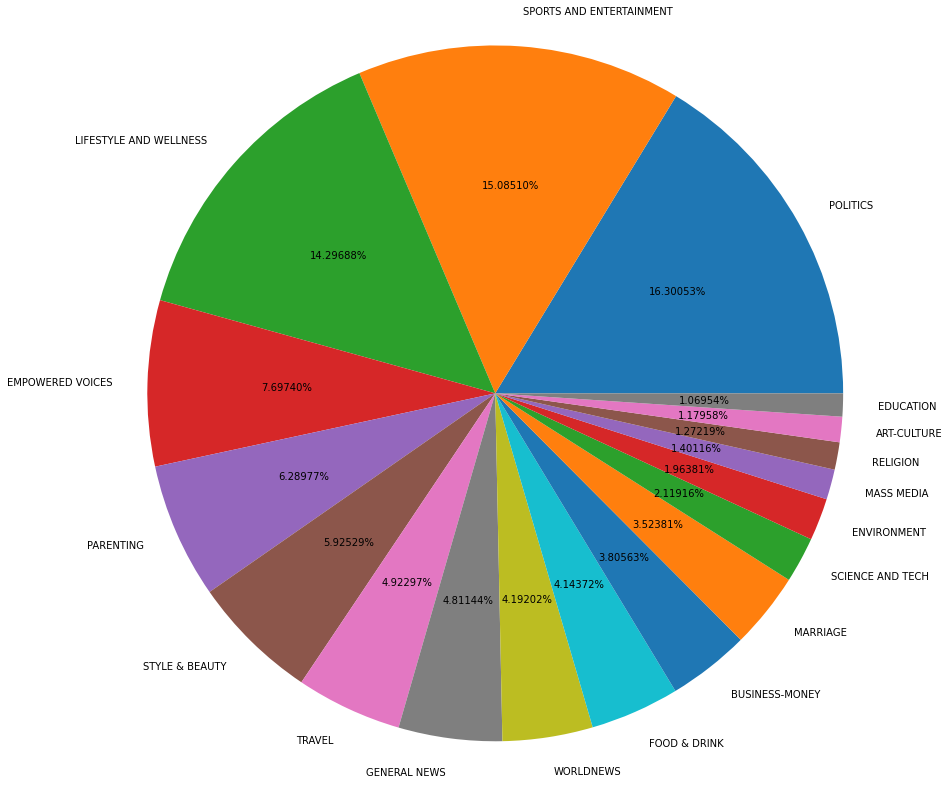

In [7]:
data = df.category.value_counts()

plt.pie(data , labels = data.keys(), autopct="%0.5f%%", radius = 4)
plt.show()

In [8]:
df.category.unique()

array(['GENERAL NEWS', 'SPORTS AND ENTERTAINMENT', 'WORLDNEWS',
       'POLITICS', 'EMPOWERED VOICES', 'BUSINESS-MONEY', 'TRAVEL',
       'MASS MEDIA', 'SCIENCE AND TECH', 'RELIGION', 'EDUCATION',
       'PARENTING', 'ART-CULTURE', 'STYLE & BEAUTY', 'ENVIRONMENT',
       'FOOD & DRINK', 'LIFESTYLE AND WELLNESS', 'MARRIAGE'], dtype=object)

In [9]:
X = df['headline_clean'].values
y = df['category'].values

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

UNDERSAMPLE

In [10]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)
total_rus = pd.DataFrame(y_rus, columns = ['category'])
total_rus.category.value_counts()

SPORTS AND ENTERTAINMENT    2148
GENERAL NEWS                2148
SCIENCE AND TECH            2148
STYLE & BEAUTY              2148
ART-CULTURE                 2148
LIFESTYLE AND WELLNESS      2148
EDUCATION                   2148
TRAVEL                      2148
RELIGION                    2148
MASS MEDIA                  2148
WORLDNEWS                   2148
EMPOWERED VOICES            2148
FOOD & DRINK                2148
MARRIAGE                    2148
ENVIRONMENT                 2148
BUSINESS-MONEY              2148
POLITICS                    2148
PARENTING                   2148
Name: category, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=0)

In [12]:
#Help to test different models
def build_and_eval_model(model, X, y, random_state=0):
    
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size = 0.25, random_state = random_state,shuffle=True)
    
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    print("Accuracy %f" % accuracy)
    
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(figsize=(15,15))
    plt.xticks(rotation=90)
    metrics.plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, ax=ax)

Accuracy 0.625905
                          precision    recall  f1-score   support

             ART-CULTURE       0.67      0.70      0.69       526
          BUSINESS-MONEY       0.57      0.56      0.56       547
               EDUCATION       0.70      0.62      0.66       528
        EMPOWERED VOICES       0.50      0.44      0.47       545
             ENVIRONMENT       0.63      0.66      0.65       523
            FOOD & DRINK       0.71      0.79      0.75       525
            GENERAL NEWS       0.43      0.41      0.42       529
  LIFESTYLE AND WELLNESS       0.44      0.49      0.46       546
                MARRIAGE       0.83      0.75      0.79       522
              MASS MEDIA       0.75      0.72      0.73       541
               PARENTING       0.63      0.62      0.63       577
                POLITICS       0.61      0.58      0.60       534
                RELIGION       0.77      0.73      0.75       506
        SCIENCE AND TECH       0.59      0.64      0.62  

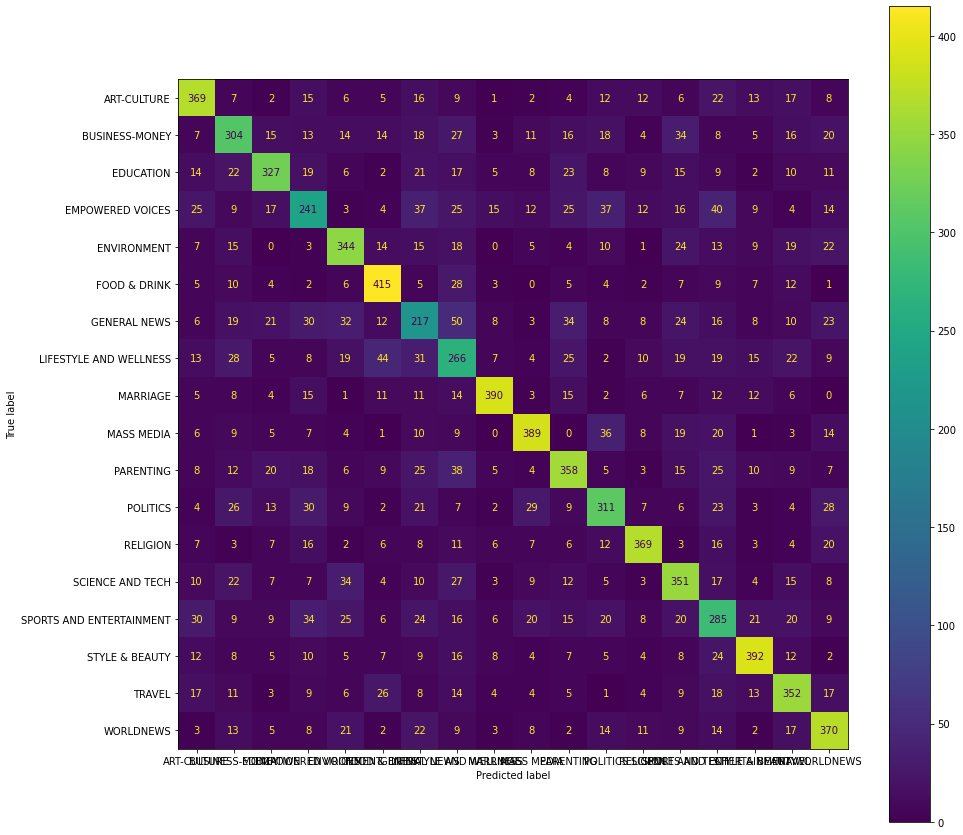

In [13]:
build_and_eval_model(model = LogisticRegression(max_iter = 1000), X = X, y = y)

Accuracy 0.620112
                          precision    recall  f1-score   support

             ART-CULTURE       0.82      0.75      0.78       526
          BUSINESS-MONEY       0.67      0.54      0.60       547
               EDUCATION       0.67      0.63      0.65       528
        EMPOWERED VOICES       0.59      0.44      0.51       545
             ENVIRONMENT       0.70      0.70      0.70       523
            FOOD & DRINK       0.69      0.75      0.72       525
            GENERAL NEWS       0.55      0.39      0.45       529
  LIFESTYLE AND WELLNESS       0.43      0.43      0.43       546
                MARRIAGE       0.81      0.76      0.78       522
              MASS MEDIA       0.78      0.78      0.78       541
               PARENTING       0.31      0.71      0.43       577
                POLITICS       0.60      0.55      0.57       534
                RELIGION       0.83      0.80      0.81       506
        SCIENCE AND TECH       0.65      0.64      0.65  

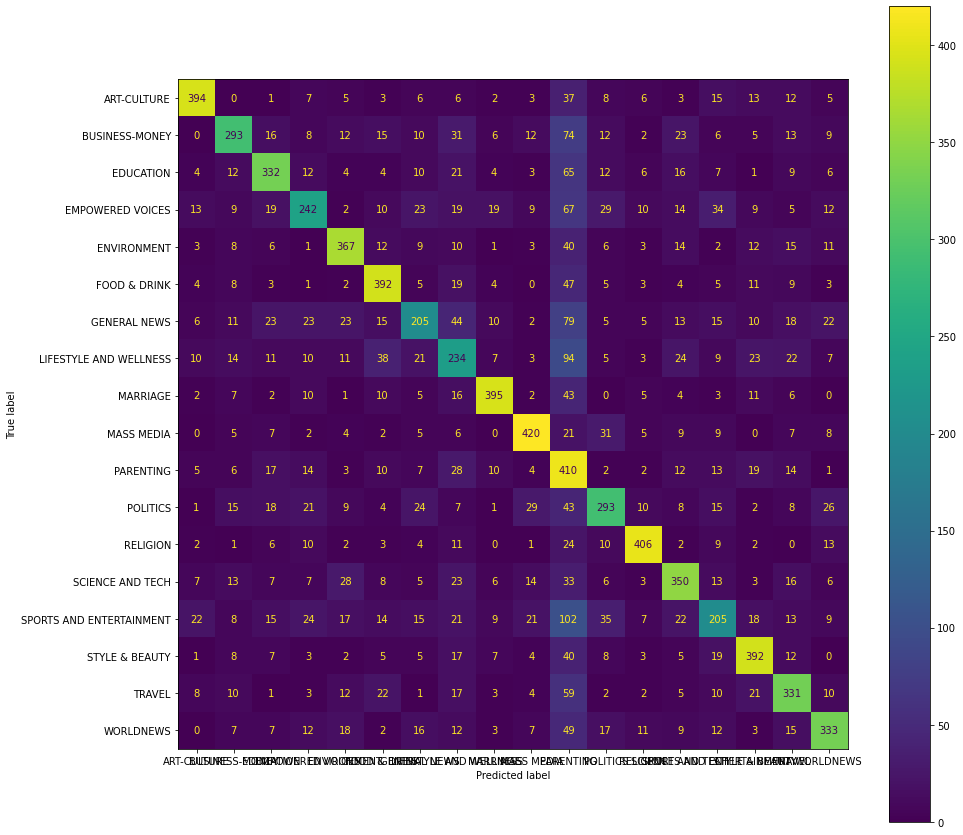

In [14]:
build_and_eval_model(model = RandomForestClassifier(n_jobs=2), X = X, y = y)

Accuracy 0.639665
                          precision    recall  f1-score   support

             ART-CULTURE       0.82      0.72      0.77       526
          BUSINESS-MONEY       0.61      0.60      0.61       547
               EDUCATION       0.76      0.60      0.67       528
        EMPOWERED VOICES       0.53      0.44      0.48       545
             ENVIRONMENT       0.75      0.67      0.71       523
            FOOD & DRINK       0.79      0.75      0.77       525
            GENERAL NEWS       0.39      0.49      0.43       529
  LIFESTYLE AND WELLNESS       0.39      0.55      0.46       546
                MARRIAGE       0.88      0.73      0.80       522
              MASS MEDIA       0.85      0.73      0.78       541
               PARENTING       0.70      0.61      0.65       577
                POLITICS       0.63      0.56      0.60       534
                RELIGION       0.89      0.73      0.81       506
        SCIENCE AND TECH       0.70      0.62      0.66  

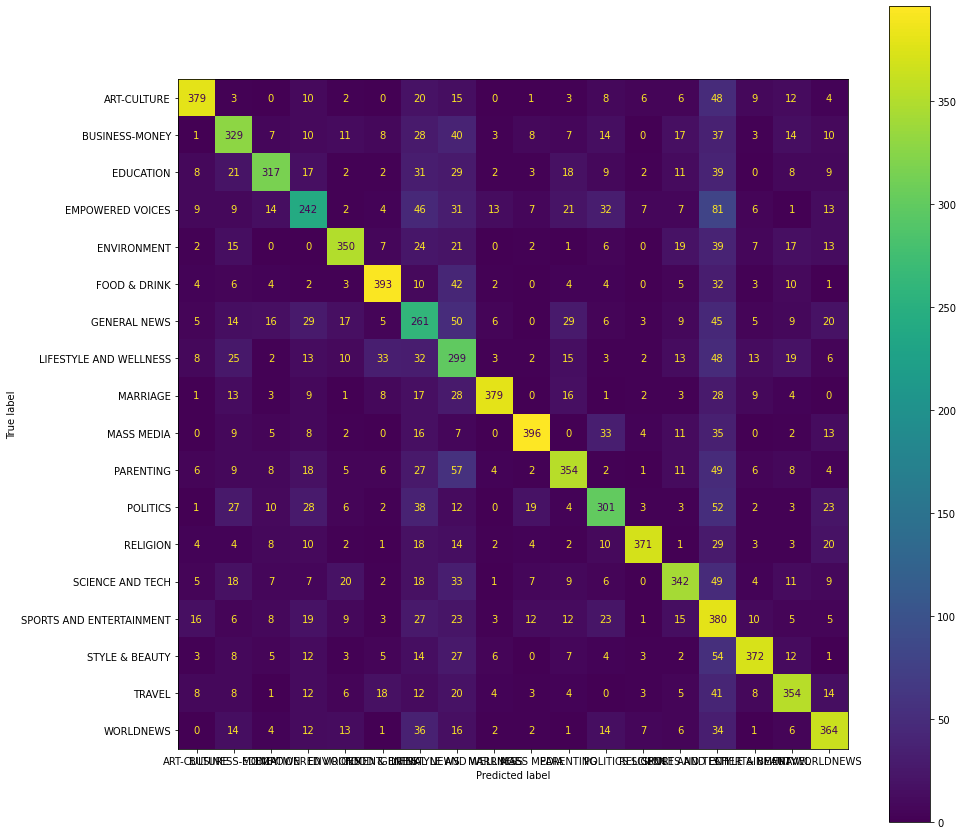

In [15]:
build_and_eval_model(model = svm.SVC(C=.8 ,kernel='rbf'), X = X, y = y)

Accuracy 0.611318
                          precision    recall  f1-score   support

             ART-CULTURE       0.65      0.76      0.70       526
          BUSINESS-MONEY       0.60      0.54      0.57       547
               EDUCATION       0.61      0.59      0.60       528
        EMPOWERED VOICES       0.45      0.43      0.44       545
             ENVIRONMENT       0.62      0.65      0.63       523
            FOOD & DRINK       0.75      0.78      0.77       525
            GENERAL NEWS       0.44      0.45      0.45       529
  LIFESTYLE AND WELLNESS       0.45      0.43      0.44       546
                MARRIAGE       0.68      0.72      0.70       522
              MASS MEDIA       0.71      0.77      0.74       541
               PARENTING       0.54      0.54      0.54       577
                POLITICS       0.54      0.54      0.54       534
                RELIGION       0.68      0.75      0.72       506
        SCIENCE AND TECH       0.62      0.60      0.61  

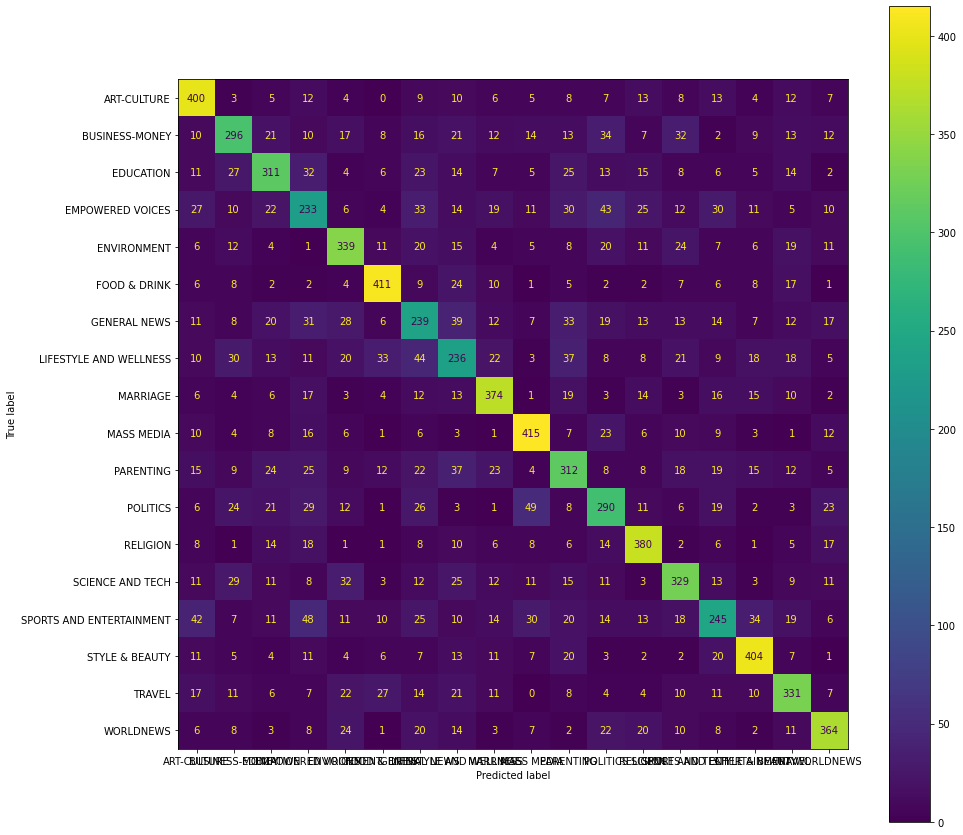

In [16]:
build_and_eval_model(model = MultinomialNB(alpha=.05), X = X, y = y)

SMOTE

In [17]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
total_smote = pd.DataFrame(y_smote, columns = ['category'])
total_smote.category.value_counts()

FOOD & DRINK                32737
WORLDNEWS                   32737
GENERAL NEWS                32737
POLITICS                    32737
ART-CULTURE                 32737
LIFESTYLE AND WELLNESS      32737
EDUCATION                   32737
EMPOWERED VOICES            32737
PARENTING                   32737
MARRIAGE                    32737
SCIENCE AND TECH            32737
MASS MEDIA                  32737
BUSINESS-MONEY              32737
ENVIRONMENT                 32737
SPORTS AND ENTERTAINMENT    32737
STYLE & BEAUTY              32737
RELIGION                    32737
TRAVEL                      32737
Name: category, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)

{'alpha': 0.01}
Model Accuracy: 0.829788


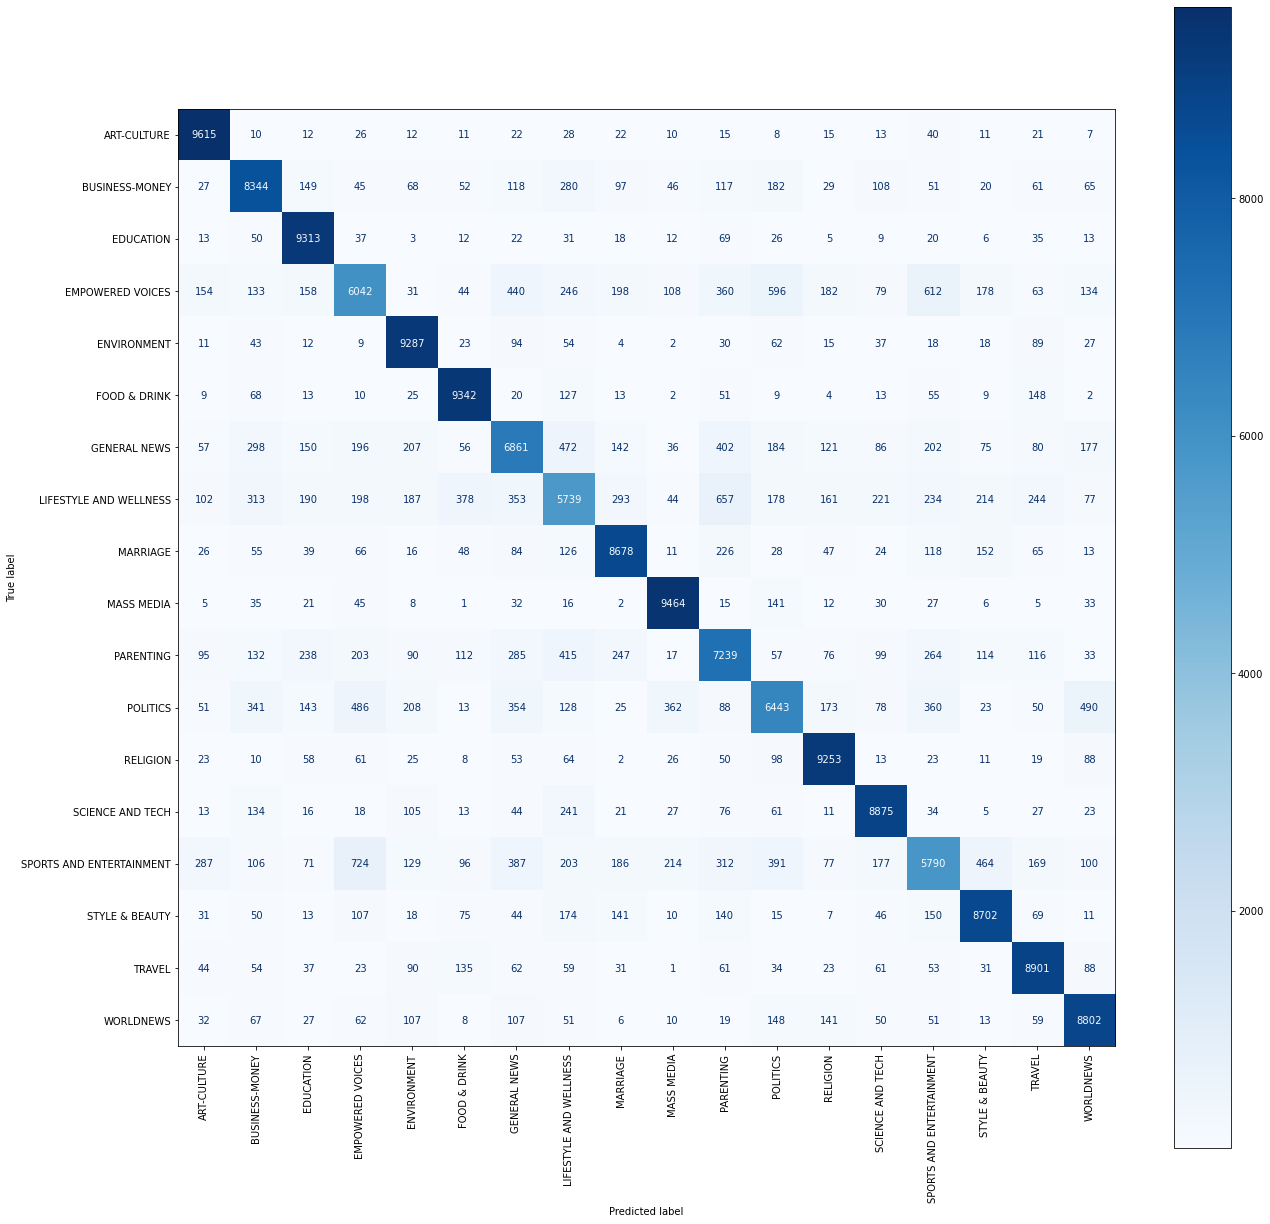

In [21]:
#find optimal param
params = {
    'alpha':[ 0.01, 0.05, 0.1],
}

grid_search_cv = GridSearchCV(
    estimator = MultinomialNB(),
    param_grid = params,
    scoring = 'f1_weighted'
)

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

model = grid_search_cv.best_estimator_

#Evaluate model
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)
y_pred = model.predict(X_test)

# Confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [19]:
#confirming how to use k-fold
kf = KFold(n_splits=2, random_state=0, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X[train_index].shape)

TRAIN: [     1      2      4 ... 200830 200831 200833] TEST: [     0      3      5 ... 200828 200829 200832]
(100417, 67299)
TRAIN: [     0      3      5 ... 200828 200829 200832] TEST: [     1      2      4 ... 200830 200831 200833]
(100417, 67299)


In [20]:
#USING X_smote, y_smote

kf = KFold(n_splits=5, random_state=0, shuffle=True)
for train_index, test_index in kf.split(X_smote):
    X_train , X_test = X_smote[train_index] , X_smote[test_index]
    y_train , y_test = y_smote[train_index] , y_smote[test_index]
    
    params = {
        'alpha':[0.01,0.1],
    }

    grid_search_cv = GridSearchCV(
        estimator = MultinomialNB(),
        param_grid = params,
        scoring = 'f1_weighted'
    )

    grid_search_cv.fit(X_train, y_train)
    print(grid_search_cv.best_params_)

    model = grid_search_cv.best_estimator_
    print(X_smote[train_index].shape)

    #Evaluate model
    accuracy = model.score(X_test, y_test)
    print("Model Accuracy: %f" % accuracy)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=model.classes_))

{'alpha': 0.01}
(471412, 67299)
Model Accuracy: 0.832827
                          precision    recall  f1-score   support

             ART-CULTURE       0.91      0.97      0.94      6565
          BUSINESS-MONEY       0.82      0.85      0.83      6554
               EDUCATION       0.89      0.96      0.92      6483
        EMPOWERED VOICES       0.73      0.64      0.69      6516
             ENVIRONMENT       0.87      0.94      0.91      6557
            FOOD & DRINK       0.89      0.95      0.92      6578
            GENERAL NEWS       0.73      0.70      0.71      6553
  LIFESTYLE AND WELLNESS       0.68      0.60      0.64      6525
                MARRIAGE       0.86      0.89      0.87      6589
              MASS MEDIA       0.91      0.95      0.93      6594
               PARENTING       0.74      0.74      0.74      6553
                POLITICS       0.75      0.66      0.70      6526
                RELIGION       0.90      0.94      0.92      6610
        SCIENCE AN

In [21]:
def predictText(text):
    print(text)
    xIn = text_pipeline(text)
    xIn = vectorizer.transform([xIn])
    print('Predicted category: ', model.predict(xIn)[0])
    data = {
        'Category': np.unique(y_smote),
        'weight': model.predict_proba(xIn)[0],
    }
    results = pd.DataFrame(data)
    print( results.sort_values('weight', ascending=False))
    #print(model.predict_proba(xIn))

In [22]:
titleSet = [
    'Obama Presidential Election Scandal',
    "Trump to launch new social media platform TRUTH Social",
    'Taxi-hailing firm reveals 4,158 reports of sexual assault',
    'Students sue Texas school district for banning long hair on boys',
    'Crime-hit Chicago grapples with police vaccine revolt'
]
for title in titleSet:
    predictText(title)
    print()

Obama Presidential Election Scandal
Predicted category:  POLITICS
                    Category    weight
11                  POLITICS  0.536769
17                 WORLDNEWS  0.164724
9                 MASS MEDIA  0.140524
12                  RELIGION  0.043396
1             BUSINESS-MONEY  0.038642
3           EMPOWERED VOICES  0.029855
14  SPORTS AND ENTERTAINMENT  0.027250
10                 PARENTING  0.005238
4                ENVIRONMENT  0.004011
15            STYLE & BEAUTY  0.003383
6               GENERAL NEWS  0.002096
13          SCIENCE AND TECH  0.001352
7     LIFESTYLE AND WELLNESS  0.001034
16                    TRAVEL  0.000677
2                  EDUCATION  0.000546
8                   MARRIAGE  0.000210
0                ART-CULTURE  0.000186
5               FOOD & DRINK  0.000107

Trump to launch new social media platform TRUTH Social
Predicted category:  MASS MEDIA
                    Category    weight
9                 MASS MEDIA  0.647611
13          SCIENCE AND TEC

In [26]:
titleSet2 = [
    'App Store Awards honor the best apps and games of 2021',
    "Dallas at New Orleans Prediction, Game Preview",
    'Living Robots Called Xenobots Can Now Reproduce, Scientists Say',
    'Germany announces nationwide lockdown for the unvaccinated',
    'The omicron panic is overdone. Buy the dips in these stocks, says JPMorgan.',
    "To Attract or to Inform: What are Titles for?",
]
for title in titleSet2:
    predictText(title)
    print()

App Store Awards honor the best apps and games of 2021
Predicted category:  SPORTS AND ENTERTAINMENT
                    Category    weight
14  SPORTS AND ENTERTAINMENT  0.219209
10                 PARENTING  0.170248
13          SCIENCE AND TECH  0.102241
3           EMPOWERED VOICES  0.093824
15            STYLE & BEAUTY  0.089455
5               FOOD & DRINK  0.078007
16                    TRAVEL  0.063399
8                   MARRIAGE  0.060014
7     LIFESTYLE AND WELLNESS  0.046662
6               GENERAL NEWS  0.032086
17                 WORLDNEWS  0.027109
11                  POLITICS  0.007149
1             BUSINESS-MONEY  0.005099
12                  RELIGION  0.002284
9                 MASS MEDIA  0.002020
4                ENVIRONMENT  0.000623
0                ART-CULTURE  0.000515
2                  EDUCATION  0.000055

Dallas at New Orleans Prediction, Game Preview
Predicted category:  SPORTS AND ENTERTAINMENT
                    Category    weight
14  SPORTS AND ENTERTAINM

In [25]:
pickle.dump(vectorizer, open('models/tf-vectorizer.pkl', 'wb'))
pickle.dump(text_pipeline, open('models/text_prep.pkl', 'wb'))
pickle.dump(model, open('models/mb-text-classifier.pkl', 'wb'))